In [1]:
"""
For your very first period:
1. Run your screen on Monday Morning
2. Buy the stocks that come through, putting an equal amount of money into each stock.
3. Hang onto those stocks for four weeks.

Then every four weeks:
1. Run your screen again.
2. Keep the previosly qualified stocks that still qualify. Sell the previously qualified stocks that no longer qualify. And buy the newly qualified stocks, putting an equal amount of money into each stock.
3. Hang onto those stocks for another four weeks.

Four weeks later, do it all again.
"""

'\nFor your very first period:\n1. Run your screen on Monday Morning\n2. Buy the stocks that come through, putting an equal amount of money into each stock.\n3. Hang onto those stocks for four weeks.\n\nThen every four weeks:\n1. Run your screen again.\n2. Keep the previosly qualified stocks that still qualify. Sell the previously qualified stocks that no longer qualify. And buy the newly qualified stocks, putting an equal amount of money into each stock.\n3. Hang onto those stocks for another four weeks.\n\nFour weeks later, do it all again.\n'

In [2]:

# Screenig: herramienta para seleccionar acciones. existen reglas para seleccionar activos financieros y lo podemos testear.  criterios para seleccionar acciones haciendo todo en codigo.
# a partir de acciones con buenos fundamentos optimizo mi funcion objetivo.  es distinto hacer un enfoque de portafolio y el otro enfoque fundamental stock screenig.  los puedo conciliar primero haciendo stock screening y luego optimizo.
#  siempre comparando con benchmark


In [3]:
## Regla 1
# Empresas que conforman el sp500
# Net income CAGR de los ultimos 4 años > 15%
# Excluimos sectores financieros, minería, real state, oil & gas, utilities
# Participacion en sp500 > 0.15%


## Regla 2
# Empresas estadounidenses que conforman el sp500
# Net income CAGR de los ultimos 3 años > 10%                   (CARG: Compound Annual Growth Rate)
# Net operating income CAGR de los ultimos 3 años > 10%
# Market capitalization > USD 100B
# Excluimos sectores: Banca y oil
# BACKTESTING :  Equally weighted portfolio

## Regla 3
# Empresas estadounidenses que conforman el sp500
# Net income CAGR de los ultimos 3 años > 10%
# Net operating income CAGR de los ultimos 3 años > 10%
# Market capitalization > USD 100B
# Excluimos sectores: Banca y oil
# BACKTESTING : Portfolio optimization mean variance

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import time    # para hacer pausas en la ejecucion del codigo

In [5]:
from pathlib import Path # manipulación de rutas
# establezco la ruta a la carpeta data

ROOT = Path.cwd() if (Path.cwd() / "data").exists() else Path.cwd().parent # si estoy en code, subo un nivel
DATA = ROOT / "data"  # carpeta data

# si no recuerdas la extensión exacta, tomará xlsx/xls
ruta = next((DATA / "sp500_new").parent.glob("sp500_new.*")) # busco el archivo que empieza con sp500_new y tiene cualquier extensión
# cargo el excel en un dataframe
lista_sp500 = pd.read_excel(ruta)
lista_sp500

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
499,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
500,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [6]:
tickers_sp500 = lista_sp500["Symbol"].to_list()   # selecciono la columna Symbol y la convierto en lista
tickers_sp500 # guardo los tickers del sp500 en una lista

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'AON',
 'APA',
 'APO',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'XYZ',
 'BK',
 'BA',
 'BKNG',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'COIN',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 'CEG',


In [7]:
yf.Ticker("AAPL").info.keys()  # obtengo las llaves del diccionario info

dict_keys(['address1', 'city', 'state', 'zip', 'country', 'phone', 'website', 'industry', 'industryKey', 'industryDisp', 'sector', 'sectorKey', 'sectorDisp', 'longBusinessSummary', 'fullTimeEmployees', 'companyOfficers', 'auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk', 'governanceEpochDate', 'compensationAsOfEpochDate', 'irWebsite', 'executiveTeam', 'maxAge', 'priceHint', 'previousClose', 'open', 'dayLow', 'dayHigh', 'regularMarketPreviousClose', 'regularMarketOpen', 'regularMarketDayLow', 'regularMarketDayHigh', 'dividendRate', 'dividendYield', 'exDividendDate', 'payoutRatio', 'fiveYearAvgDividendYield', 'beta', 'trailingPE', 'forwardPE', 'volume', 'regularMarketVolume', 'averageVolume', 'averageVolume10days', 'averageDailyVolume10Day', 'bid', 'ask', 'bidSize', 'askSize', 'marketCap', 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', 'priceToSalesTrailing12Months', 'fiftyDayAverage', 'twoHundredDayAverage', 'trailingAnnualDividendRate', 'trailingAnnualDividen

In [8]:
yf.Ticker("AAPL").info   # obtengo la informacion fundamental de apple

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '(408) 996-1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and p

In [9]:
ratios = {"Ticker":[],"Nombre":[],"Mkt_cap":[],"Ventas_ult_año":[],"Ventas_prev_año":[],"Net_income_ult_año":[],"Net_income_prev_año":[]} 
# creo un diccionario con las llaves que quiero obtener
# regla de trading basandome en fundamentales

In [10]:
# creando los datos para el diccionario ratios.    # el "i" hace referencia a cada ticker y asi voy recorriendo la lista de tickers
ratios = {"Ticker":[],"Nombre":[],"Mkt_cap":[],"Ventas_ult_año":[],"Ventas_prev_año":[],"Net_income_ult_año":[],"Net_income_prev_año":[]}
for i in tickers_sp500:  # Inicia un loop sobre cada símbolo del S&P 500
    try: # Abre un bloque try para capturar cualquier error de descarga/parseo sin detener todo el loop.
        ticker_info = yf.Ticker(i).info # Crea el objeto Ticker de yfinance y pide el diccionario info
        income_statement = yf.Ticker(i).income_stmt # Pide el estado de resultados (income statement) como un DataFrame de pandas

        ratios["Ticker"].append(i) # Agrega el símbolo actual a la lista "Ticker"

        if "shortName" in ticker_info.keys():
            ratios["Nombre"].append(ticker_info["shortName"])  # Si info trae "shortName", lo añade; si no, None.
        else:
            ratios["Nombre"].append(None)

        if "marketCap" in ticker_info.keys():
            ratios["Mkt_cap"].append(ticker_info["marketCap"]) # Si info trae "marketCap", lo añade; si no, None.
        else:
            ratios["Mkt_cap"].append(None)

        if "Total Revenue" in income_statement.index:
            ratios["Ventas_ult_año"].append(income_statement.loc["Total Revenue",income_statement.columns[0]]) # si existe la fila "Total Revenue", toma el valor en la columna 0 (normalmente el período más reciente); si no, None
        else:
            ratios["Ventas_ult_año"].append(None) 

        if "Total Revenue" in income_statement.index and len(income_statement.columns) > 3:
            ratios["Ventas_prev_año"].append(income_statement.loc["Total Revenue",income_statement.columns[3]]) # si hay "Total Revenue" y hay al menos 4 columnas, tomar la columna 3 como “año previo”. (Asumes orden de columnas del más reciente al más antiguo.)
        else:
            ratios["Ventas_prev_año"].append(None)

        if "Net Income" in income_statement.index:
            ratios["Net_income_ult_año"].append(income_statement.loc["Net Income",income_statement.columns[0]]) # si existe la fila "Net Income", toma el valor en la columna 0 (normalmente el período más reciente); si no, None
        else:
            ratios["Net_income_ult_año"].append(None)

        if "Net Income" in income_statement.index and len(income_statement.columns) > 3:
            ratios["Net_income_prev_año"].append(income_statement.loc["Net Income",income_statement.columns[3]]) # si hay "Net Income" y hay al menos 4 columnas, tomar la columna 3 como “año previo”. (Asumes orden de columnas del más reciente al más antiguo.)
        else:
            ratios["Net_income_prev_año"].append(None)                                         
    
    except Exception as e:
        print(f"Could not retrieve data for {i}: {e}") # Muestra un mensaje de error si no se pudo obtener la información para el ticker actual
        # Append None for all keys in there´s an error
        for key in ratios.keys(): # Asegura que todas las listas en el diccionario tengan la misma longitud
            if key != "Ticker": # El ticker ya se añadió al inicio del bloque try
                ratios[key].append(None) 
        # Ticker is already added a the beginning of the try block

    time.sleep(2)        # Pausa de 2 segundos entre iteraciones para evitar sobrecargar los servidores de Yahoo Finance

# .append(i) agrega un elemento al final de la lista
# .loc[ fila_por_nombre , columna_por_nombre ]
# .columns[0]  selecciona la primera columna
# iloc[ fila_por_posición , columna_por_posición ]
# En info: claves como "shortName", "marketCap"
# En income_statement: filas como "Total Revenue", "Net Income"
# index son las filas de un dataframe 
# columns son las columnas de un dataframe
# len devuelve la longitud de un objeto (número de elementos en una lista, número de filas/columnas en un dataframe, etc.)
# keys() devuelve las llaves de un diccionario
# Exception captura errores en el bloque try 
# > 3: se usa cuando necesitas la columna de posición 3 (4º periodo)

In [11]:
df_ratios = pd.DataFrame(ratios)  # convierto el diccionario en un dataframe
df_ratios 

,Ticker,Nombre,Mkt_cap,Ventas_ult_año,Ventas_prev_año,Net_income_ult_año,Net_income_prev_año
0,MMM,3M Company,8.179600e+10,2.457500e+10,3.535500e+10,4.173000e+09,5.921000e+09
1,AOS,A.O. Smith Corporation,1.015802e+10,3.818100e+09,3.538900e+09,5.336000e+08,4.871000e+08
2,ABT,Abbott Laboratories,2.251459e+11,4.195000e+10,4.307500e+10,1.340200e+10,7.071000e+09
3,ABBV,AbbVie Inc.,3.738748e+11,5.633400e+10,5.619700e+10,4.278000e+09,1.154200e+10
4,ACN,Accenture plc,1.514218e+11,6.489646e+10,5.053339e+10,7.264787e+09,5.906809e+09
...,...,...,...,...,...,...,...
499,XYL,Xylem Inc.,3.352486e+10,8.562000e+09,5.195000e+09,8.900000e+08,4.270000e+08
500,YUM,"Yum! Brands, Inc.",4.052581e+10,7.549000e+09,6.584000e+09,1.486000e+09,1.575000e+09
501,ZBRA,Zebra Technologies Corporation,1.556829e+10,4.981000e+09,5.627000e+09,5.280000e+08,8.370000e+08
502,ZBH,"Zimmer Biomet Holdings, Inc.",2.026522e+10,7.678600e+09,6.827300e+09,9.038000e+08,4.016000e+08


In [12]:
df_ratios["Var_Ventas"]= ((df_ratios["Ventas_ult_año"]/df_ratios["Ventas_prev_año"])**(1/3)-1)*100  # CAGR de ventas en los ultimos 3 años
# para que sirve el **(1/3) ?   # raiz cubica porque son 3 años 
# para que sirve el *100 ?   # para pasarlo a porcentaje
# para que sirve el -1 ?   # para restar el 100% inicial y obtener solo el crecimiento neto
df_ratios["Var_net_income"]=((df_ratios["Net_income_ult_año"]/df_ratios["Net_income_prev_año"])**(1/3)-1)*100 # CAGR de net income en los ultimos 3 años
df_ratios


,Ticker,Nombre,Mkt_cap,Ventas_ult_año,Ventas_prev_año,Net_income_ult_año,Net_income_prev_año,Var_Ventas,Var_net_income
0,MMM,3M Company,8.179600e+10,2.457500e+10,3.535500e+10,4.173000e+09,5.921000e+09,-11.417576,-11.007971
1,AOS,A.O. Smith Corporation,1.015802e+10,3.818100e+09,3.538900e+09,5.336000e+08,4.871000e+08,2.563540,3.085891
2,ABT,Abbott Laboratories,2.251459e+11,4.195000e+10,4.307500e+10,1.340200e+10,7.071000e+09,-0.878266,23.755049
3,ABBV,AbbVie Inc.,3.738748e+11,5.633400e+10,5.619700e+10,4.278000e+09,1.154200e+10,0.081196,-28.167678
4,ACN,Accenture plc,1.514218e+11,6.489646e+10,5.053339e+10,7.264787e+09,5.906809e+09,8.696160,7.141236
...,...,...,...,...,...,...,...,...,...
499,XYL,Xylem Inc.,3.352486e+10,8.562000e+09,5.195000e+09,8.900000e+08,4.270000e+08,18.121755,27.738176
500,YUM,"Yum! Brands, Inc.",4.052581e+10,7.549000e+09,6.584000e+09,1.486000e+09,1.575000e+09,4.664612,-1.920235
501,ZBRA,Zebra Technologies Corporation,1.556829e+10,4.981000e+09,5.627000e+09,5.280000e+08,8.370000e+08,-3.983352,-14.236436
502,ZBH,"Zimmer Biomet Holdings, Inc.",2.026522e+10,7.678600e+09,6.827300e+09,9.038000e+08,4.016000e+08,3.994655,31.046737


In [13]:
df_ratios["Clasification"]=np.where((df_ratios["Var_Ventas"]>= 10)& (df_ratios["Var_net_income"]>= 10), "Buy", "No Buy")
# df_ratios : Crea (o sobrescribe) la columna llamada "Clasification" en el DataFrame df_ratios con el resultado del lado derecho
# np.where(condición, valor_si_True, valor_si_False) : función de NumPy que devuelve un arreglo del mismo largo que la condición: si la condición es True en una fila, pone "Buy"; si es False, pone "No Buy"
# (df_ratios["Var_Ventas"] >= 10) : Toma la columna Var_Ventas (una Series) y compara elemento a elemento con 10. Devuelve una Series booleana: True donde la variación (en tu caso porcentaje) es ≥ 10, False en caso contrario.
# & : operador "AND" bit a bit. En pandas, se usa para combinar dos Series booleanas elemento a elemento.


In [14]:
shortlisted_df = df_ratios[df_ratios["Clasification"]=="Buy"].sort_values(by="Mkt_cap", ascending=False).head(10) # filtro el dataframe para quedarme solo con las filas donde la columna Clasification es "Buy" y ordeno por Mkt_cap descendente
shortlisted_df["Mkt_cap"] = shortlisted_df["Mkt_cap"]/1000000000 # la expresas en miles de millones
shortlisted_df = shortlisted_df[["Ticker","Nombre","Mkt_cap"]] # selecciono solo las columnas que me interesan
shortlisted_df = shortlisted_df.reset_index(drop=True) # 
shortlisted_df # las 10 empresas que en los ultimos 3 años han tenido un crecimiento de mas del 10% en ventas y resultado del ejercicio (regla de trading)

,Ticker,Nombre,Mkt_cap
0,NVDA,NVIDIA Corporation,4317.453746
1,MSFT,Microsoft Corporation,3719.335248
2,AMZN,"Amazon.com, Inc.",2456.446304
3,META,"Meta Platforms, Inc.",1889.079001
4,ORCL,Oracle Corporation,922.223116
5,LLY,Eli Lilly and Company,676.484415
6,V,Visa Inc.,656.270623
7,MA,Mastercard Incorporated,523.766497
8,CRM,"Salesforce, Inc.",230.926647
9,DIS,Walt Disney Company (The),208.182313


In [15]:
tickers_shortlisted = shortlisted_df["Ticker"].to_list()  # convierto la columna Ticker en una lista
tickers_shortlisted

['NVDA', 'MSFT', 'AMZN', 'META', 'ORCL', 'LLY', 'V', 'MA', 'CRM', 'DIS']

In [16]:
data = yf.download(tickers_shortlisted, period="1y",auto_adjust=False)["Adj Close"].pct_change().dropna()  # .pct_change() calcula los rendimientos diarios a partir de los precios ajustados. .dropna() elimina filas con NaN (el primer día será NaN porque no hay día previo para comparar)
data

[*********************100%***********************]  10 of 10 completed


Ticker,AMZN,CRM,DIS,LLY,MA,META,MSFT,NVDA,ORCL,V
Date,,,,,,,,,,
2024-09-12,0.013440,0.015226,0.011096,0.015344,0.008050,0.026903,0.009361,0.019162,0.026721,0.004965
2024-09-13,-0.002727,0.004736,0.013998,-0.012096,0.002540,-0.001864,0.008407,-0.000336,0.004028,0.006938
2024-09-16,-0.008580,0.009192,0.014357,-0.000184,0.008817,0.017477,0.001742,-0.019479,0.051225,0.010893
2024-09-17,0.010763,-0.006695,0.010996,-0.018797,0.006590,0.005701,0.008833,-0.010190,-0.016791,0.003718
2024-09-18,-0.002408,-0.009263,0.007754,-0.001335,-0.012435,0.003039,-0.009973,-0.019206,-0.017555,-0.010564
...,...,...,...,...,...,...,...,...,...,...
2025-09-04,0.042878,-0.048509,0.012183,0.006885,0.003978,0.015738,0.005185,0.006095,-0.002014,0.000342
2025-09-05,-0.014214,0.027663,-0.007575,-0.021133,-0.019173,0.005076,-0.025533,-0.027030,0.043946,-0.022137
2025-09-08,0.015108,0.006022,0.007887,0.015718,0.004074,-0.000199,0.006465,0.007724,0.024399,-0.002681


In [17]:
weights = pd.Series(1/len(tickers_shortlisted), index=tickers_shortlisted)  # pesos iguales para cada acción en la lista
weights # index=tickers_shortlisted : para que los índices de la serie sean los tickers

NVDA    0.1
MSFT    0.1
AMZN    0.1
META    0.1
ORCL    0.1
LLY     0.1
V       0.1
MA      0.1
CRM     0.1
DIS     0.1
dtype: float64

In [18]:
data["Port_returns"] = (data*weights).sum(axis=1)  # rendimiento diario del portafolio como la suma ponderada de los rendimientos diarios de cada acción
data

Ticker,AMZN,CRM,DIS,LLY,MA,META,MSFT,NVDA,ORCL,V,Port_returns
Date,,,,,,,,,,,
2024-09-12,0.013440,0.015226,0.011096,0.015344,0.008050,0.026903,0.009361,0.019162,0.026721,0.004965,0.015027
2024-09-13,-0.002727,0.004736,0.013998,-0.012096,0.002540,-0.001864,0.008407,-0.000336,0.004028,0.006938,0.002362
2024-09-16,-0.008580,0.009192,0.014357,-0.000184,0.008817,0.017477,0.001742,-0.019479,0.051225,0.010893,0.008546
2024-09-17,0.010763,-0.006695,0.010996,-0.018797,0.006590,0.005701,0.008833,-0.010190,-0.016791,0.003718,-0.000587
2024-09-18,-0.002408,-0.009263,0.007754,-0.001335,-0.012435,0.003039,-0.009973,-0.019206,-0.017555,-0.010564,-0.007195
...,...,...,...,...,...,...,...,...,...,...,...
2025-09-04,0.042878,-0.048509,0.012183,0.006885,0.003978,0.015738,0.005185,0.006095,-0.002014,0.000342,0.004276
2025-09-05,-0.014214,0.027663,-0.007575,-0.021133,-0.019173,0.005076,-0.025533,-0.027030,0.043946,-0.022137,-0.006011
2025-09-08,0.015108,0.006022,0.007887,0.015718,0.004074,-0.000199,0.006465,0.007724,0.024399,-0.002681,0.008452


In [19]:
data["Port_returns_cumprod"] = ((1+data["Port_returns"]).cumprod()-1)  # producto acumulativo de los rendimientos diarios del portafolio, restando 1 para obtener el rendimiento total acumulado
data 

Ticker,AMZN,CRM,DIS,LLY,MA,META,MSFT,NVDA,ORCL,V,Port_returns,Port_returns_cumprod
Date,,,,,,,,,,,,
2024-09-12,0.013440,0.015226,0.011096,0.015344,0.008050,0.026903,0.009361,0.019162,0.026721,0.004965,0.015027,0.015027
2024-09-13,-0.002727,0.004736,0.013998,-0.012096,0.002540,-0.001864,0.008407,-0.000336,0.004028,0.006938,0.002362,0.017425
2024-09-16,-0.008580,0.009192,0.014357,-0.000184,0.008817,0.017477,0.001742,-0.019479,0.051225,0.010893,0.008546,0.026120
2024-09-17,0.010763,-0.006695,0.010996,-0.018797,0.006590,0.005701,0.008833,-0.010190,-0.016791,0.003718,-0.000587,0.025517
2024-09-18,-0.002408,-0.009263,0.007754,-0.001335,-0.012435,0.003039,-0.009973,-0.019206,-0.017555,-0.010564,-0.007195,0.018139
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-04,0.042878,-0.048509,0.012183,0.006885,0.003978,0.015738,0.005185,0.006095,-0.002014,0.000342,0.004276,0.269760
2025-09-05,-0.014214,0.027663,-0.007575,-0.021133,-0.019173,0.005076,-0.025533,-0.027030,0.043946,-0.022137,-0.006011,0.262127
2025-09-08,0.015108,0.006022,0.007887,0.015718,0.004074,-0.000199,0.006465,0.007724,0.024399,-0.002681,0.008452,0.272794


In [20]:
data["SPY"] = yf.download("SPY", period="1y",auto_adjust=False)["Adj Close"].pct_change().dropna()
# obtengo los rendimientos diarios del spy para comparar
data

[*********************100%***********************]  1 of 1 completed


Ticker,AMZN,CRM,DIS,LLY,MA,META,MSFT,NVDA,ORCL,V,Port_returns,Port_returns_cumprod,SPY
Date,,,,,,,,,,,,,
2024-09-12,0.013440,0.015226,0.011096,0.015344,0.008050,0.026903,0.009361,0.019162,0.026721,0.004965,0.015027,0.015027,0.008423
2024-09-13,-0.002727,0.004736,0.013998,-0.012096,0.002540,-0.001864,0.008407,-0.000336,0.004028,0.006938,0.002362,0.017425,0.005223
2024-09-16,-0.008580,0.009192,0.014357,-0.000184,0.008817,0.017477,0.001742,-0.019479,0.051225,0.010893,0.008546,0.026120,0.001477
2024-09-17,0.010763,-0.006695,0.010996,-0.018797,0.006590,0.005701,0.008833,-0.010190,-0.016791,0.003718,-0.000587,0.025517,0.000409
2024-09-18,-0.002408,-0.009263,0.007754,-0.001335,-0.012435,0.003039,-0.009973,-0.019206,-0.017555,-0.010564,-0.007195,0.018139,-0.002966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-04,0.042878,-0.048509,0.012183,0.006885,0.003978,0.015738,0.005185,0.006095,-0.002014,0.000342,0.004276,0.269760,0.008357
2025-09-05,-0.014214,0.027663,-0.007575,-0.021133,-0.019173,0.005076,-0.025533,-0.027030,0.043946,-0.022137,-0.006011,0.262127,-0.002896
2025-09-08,0.015108,0.006022,0.007887,0.015718,0.004074,-0.000199,0.006465,0.007724,0.024399,-0.002681,0.008452,0.272794,0.002457


In [21]:
data["SPY_returns_cumprod"] = ((1+data["SPY"]).cumprod()-1)  # producto acumulativo de los rendimientos diarios del spy, restando 1 para obtener el rendimiento total acumulado
data

Ticker,AMZN,CRM,DIS,LLY,MA,META,MSFT,NVDA,ORCL,V,Port_returns,Port_returns_cumprod,SPY,SPY_returns_cumprod
Date,,,,,,,,,,,,,,
2024-09-12,0.013440,0.015226,0.011096,0.015344,0.008050,0.026903,0.009361,0.019162,0.026721,0.004965,0.015027,0.015027,0.008423,0.008423
2024-09-13,-0.002727,0.004736,0.013998,-0.012096,0.002540,-0.001864,0.008407,-0.000336,0.004028,0.006938,0.002362,0.017425,0.005223,0.013690
2024-09-16,-0.008580,0.009192,0.014357,-0.000184,0.008817,0.017477,0.001742,-0.019479,0.051225,0.010893,0.008546,0.026120,0.001477,0.015187
2024-09-17,0.010763,-0.006695,0.010996,-0.018797,0.006590,0.005701,0.008833,-0.010190,-0.016791,0.003718,-0.000587,0.025517,0.000409,0.015602
2024-09-18,-0.002408,-0.009263,0.007754,-0.001335,-0.012435,0.003039,-0.009973,-0.019206,-0.017555,-0.010564,-0.007195,0.018139,-0.002966,0.012590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-04,0.042878,-0.048509,0.012183,0.006885,0.003978,0.015738,0.005185,0.006095,-0.002014,0.000342,0.004276,0.269760,0.008357,0.185392
2025-09-05,-0.014214,0.027663,-0.007575,-0.021133,-0.019173,0.005076,-0.025533,-0.027030,0.043946,-0.022137,-0.006011,0.262127,-0.002896,0.181959
2025-09-08,0.015108,0.006022,0.007887,0.015718,0.004074,-0.000199,0.006465,0.007724,0.024399,-0.002681,0.008452,0.272794,0.002457,0.184862


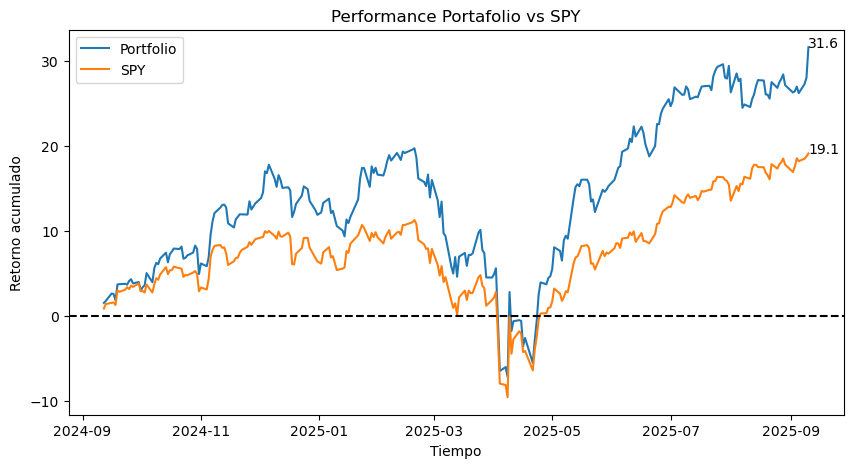

In [22]:
plt.figure(figsize=(10,5)) # tamaño de la figura
plt.plot(data["Port_returns_cumprod"]*100,label="Portfolio") # multiplico por 100 para pasarlo a porcentaje
plt.text(data.index[-1],data["Port_returns_cumprod"].iloc[-1]*100,round(data["Port_returns_cumprod"].iloc[-1]*100,1)) # coloco el texto al final de la serie de tiempo, redondeado a 1 decimal
plt.plot(data["SPY_returns_cumprod"]*100,label="SPY") # multiplico por 100 para pasarlo a porcentaje
plt.text(data.index[-1],data["SPY_returns_cumprod"].iloc[-1]*100,round(data["SPY_returns_cumprod"].iloc[-1]*100,1)) # coloco el texto al final de la serie de tiempo, redondeado a 1 decimal
plt.title("Performance Portafolio vs SPY") # titulo del grafico
plt.axhline(y=0,color="black",linestyle="--") # linea horizontal en y=0
plt.xlabel("Tiempo") # etiqueta del eje x
plt.ylabel("Retorno acumulado") # etiqueta del eje y
plt.legend() # leyenda
plt.show()  # muestra el grafico

In [26]:
from pathlib import Path
from datetime import datetime

here = Path.cwd()  # carpeta donde se está ejecutando el intérprete
# Detecta 'output' en la raíz o como hermana de 'code'
if (here / "output").exists():
    OUT = here / "output"                          # p.ej. estás en la raíz del repo
elif here.name == "code" and (here.parent / "output").exists():
    OUT = here.parent / "output"                   # estás dentro de 'code/'; sube y usa 'output/'
else:
    raise FileNotFoundError("No encuentro la carpeta 'output'. Asegúrate de tener 'code', 'data' y 'output' al mismo nivel.")

ts = datetime.now().strftime("%Y%m%d_%H%M%S")      # opcional: timestamp para no sobreescribir
outfile = OUT / f"ratios_{ts}.xlsx"                # output/ratios_YYYYMMDD_HHMMSS.xlsx

df_ratios.to_excel(outfile, index=False, sheet_name="Ratios")
print(f"Guardado en: {outfile.resolve()}")


Guardado en: C:\Users\Usuario\Desktop\CICLOWAA8\python aplicado a fi\python-aplicado-a-finanzas\output\ratios_20250910_203828.xlsx
